<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

**1.1 Импортируем необходимые библиотеки.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

**1.2 Пользовательские функции.**

In [2]:
# Напишем функцию для первичной проверки данных

def check_data(data_df):
    print ('\033[1m' + 'Изучим исходные данные'+ '\033[0m')
    print(data_df.info())
    print(data_df.shape)
        
    missed_cells = data_df.isnull().sum().sum()/(data_df.shape[0]*(data_df.shape[1]-1))
    missed_rows = sum(data_df.isnull().sum(axis = 1)>0)/data_df.shape[0]
    print ('\033[1m' + '\nПроверка пропусков'+ '\033[0m')
    print ('Количество пропусков: {:.0f}'.format(data_df.isnull().sum().sum()))
    print ('Доля пропусков: {:.1%}'.format(missed_cells)+ '\033[0m')
    print ('Доля строк содержащих пропуски: {:.1%}'.format(missed_rows))

    ## Проверим дубликаты
    
    print ('\033[1m' + '\nПроверка на дубликаты'+ '\033[0m')
    print('Количество полных дубликатов: ', data_df.duplicated().sum())
        
    ## Посмотрим на сами данные
    
    print ('\033[1m' + '\nПервые пять строк датасета'+ '\033[0m')
    display(data_df.head())
    
    print('\033[1m' + '\nОписание количественных данных:'+ '\033[0m')
    display(data_df.describe().T)

In [3]:
# Функция отрисовки гистограмм и ящика с усами для количесвтенных переменных.

def plot_hist(data, col_column):
    rows = len(col_column)
    f, ax = plt.subplots(rows,2, figsize=(8, 15))
    f.tight_layout()
    f.set_figheight(30)
    f.set_figwidth(14)
    plt.rcParams.update({'font.size': 18})
    
    for i, col in enumerate(col_column):         
        sns.histplot(data[col], kde=True, bins=24, ax = ax[i, 0])                    
        sns.boxplot(data[col], ax = ax[i, 1])

        ax[i, 0].set_xlabel(col)
        ax[i, 1].set_xlabel(col)
        ax[i, 0].set_ylabel('Количество')
    plt.suptitle("Гистограмма и ящик с усами для количесвтенных данных", fontsize=22, y=1.01)
    plt.show()

**1.3 Загрузим данные.**

In [4]:
df = pd.read_csv('/datasets/insurance.csv')

In [5]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


**1.4 Первичный осмотр данных.**

In [6]:
# ОПИСАТЕЛЬНЫЙ АНАЛИЗ

check_data(df)

Изучим исходные данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
(5000, 5)

Проверка пропусков
Количество пропусков: 0
Доля пропусков: 0.0%
Доля строк содержащих пропуски: 0.0%

Проверка на дубликаты
Количество полных дубликатов:  153

Первые пять строк датасета


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0



Описание количественных данных:


,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


In [7]:
# Вывод всех задублированных строк

df[df.duplicated()]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


**Полных дубликатов не наблюдается, есть совпадающие признаки, оставим всё как есть.**

In [8]:
# Изменим тип данных в столбцах 'Зарплата' и 'Возраст'

df['Зарплата'] = df['Зарплата'].astype(int)
df['Возраст'] = df['Возраст'].astype(int)

In [9]:
# Проверим

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


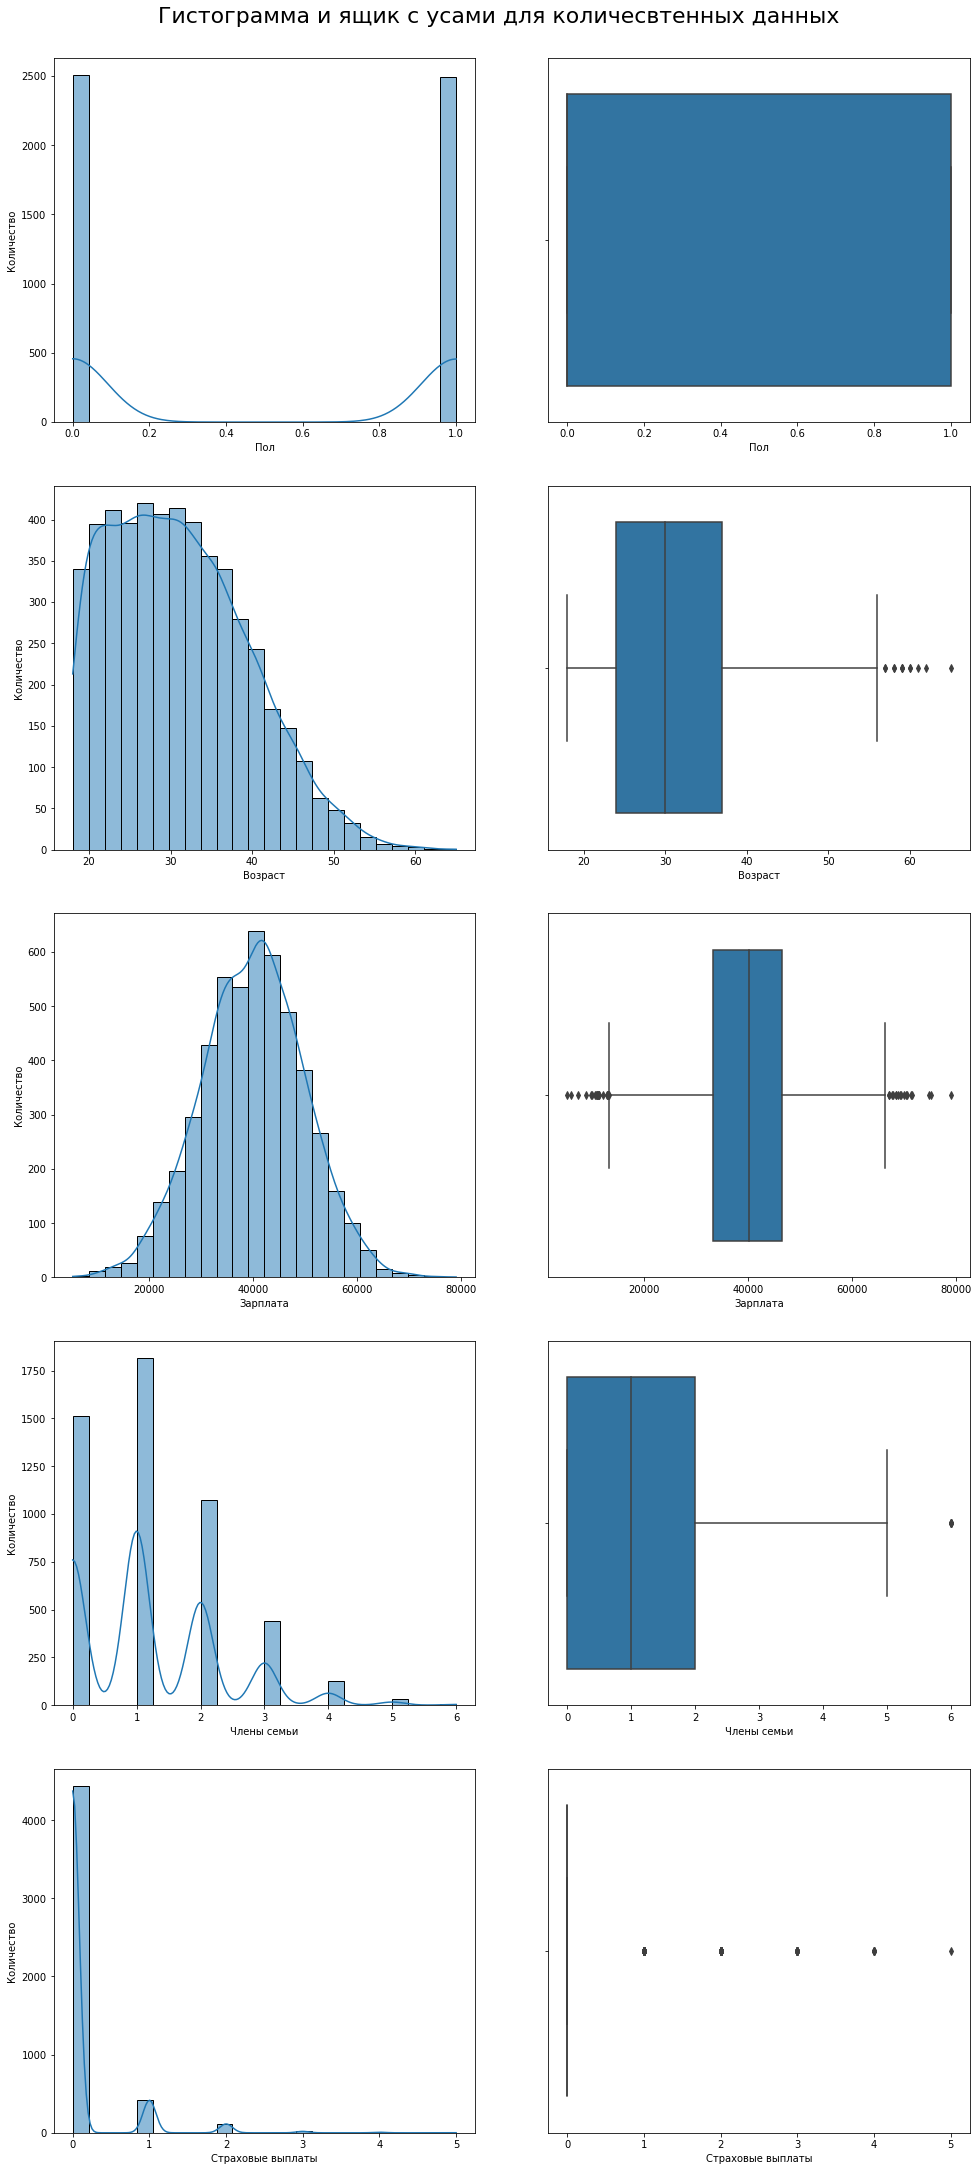

In [10]:
# ГРАФИЧЕСКИЙ АНАЛИЗ количественных данных 
plot_hist(df, df.select_dtypes(exclude=[object]).columns)

Из графического анализа мы видим:
- мужчины и женщины поделены примерно 50/50;
- больше всего клиентов от 25 до 35 лет;
- по зарплате практически нормальное распределение;
- в основном в семье - 1 человек;
- больше 4000 клиентов не получали страховые выплаты.

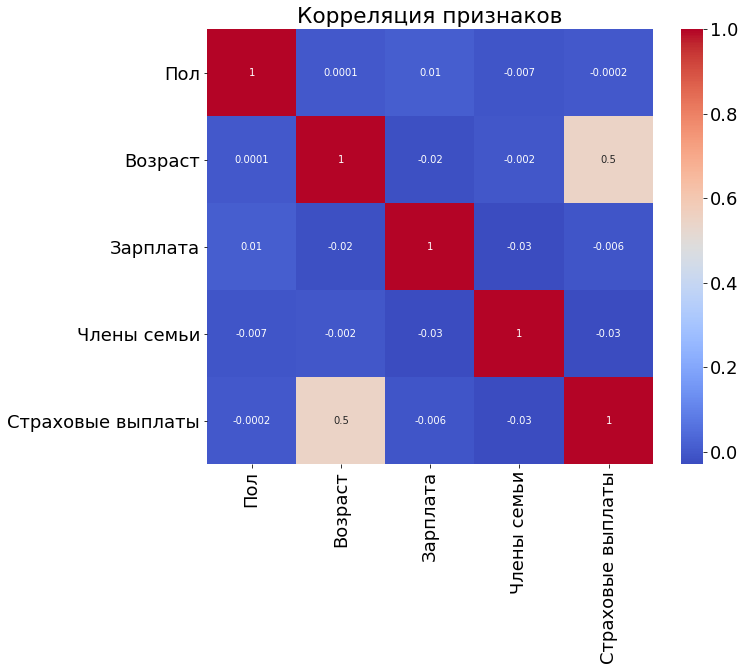

In [11]:
# Проверим на мультиколлинеарность 

plt.figure(figsize=(10, 8))
plt.title('Корреляция признаков')
sns.heatmap(df.corr(method='spearman'), annot = True, cmap="coolwarm", annot_kws={'size':10}, fmt='.1g')
plt.show()

Мультиколлинеарности нет, есть зависимость кол-ва страховых выплат от возраста, но она умеренная.

**Вывод:**
- в таблице 5000 строк и 5 столбцов;
- пропусков нет;
- выявлено 153 дубликата из-за совпадения признаков;
- изменён тип данных, где это было необходимо.

Из графического анализа выявлено:
- мужчины и женщины поделены примерно 50/50;
- больше всего клиентов от 25 до 35 лет;
- по зарплате практически нормальное распределение;
- в основном в семье - 1 человек;
- больше 4000 клиентов не получали страховые выплаты.

- мультиколлинеарности нет, есть зависимость кол-ва страховых выплат от возроста, но она умеренная.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? \
**Ответ:** не изменится

**Обоснование:**
1. Для модели на преобразованных признаках $a' = X'w' = (XP)w'$, где P - случайная обратимая матрица. 
возьмем формулу обучения, запишем её для w', подставляя XP вместо X:
$$
w' = ((XP)^T (XP))^{-1} (XP)^T y
$$
2. Воспользуемся свойствами матриц: \
 Cвойство 1:
$$
(AB)^T=B^TA^T   
$$ \
 Cвойство 2:
$$
(AB)^{-1}=B^{-1}A^{-1}
$$ \
 Cвойство 3:
$$
AA^{-1} = E
$$
3. Раскроем скобки: \
 3.1 Используем свойство 1:
$$
w' = (P^TX^TXP)^{-1} P^TX^T y
$$ \
 3.2 Используем свойство 2:
$$
w' = (P^T)^{-1}(X^TX)^{-1}P^{-1} P^TX^T y
$$ \
 3.3 Используем свойство 3:
$$
w' = (X^TX)^{-1}P^{-1}X^T y
$$


4. Т.к. $w = (X^T X)^{-1} X^T y$, получаем:
$$
w' = P^{-1}w
$$
5. Подставим в формулу предсказаний:
$$
a' = XPP^{-1}w = Xw = a
$$
Что и требовалось доказать - домножение признаков на обратимую матрицу не влияет на предсказания модели. \
Параметры линейной регрессии в исходной задаче и в преобразованной связаны следующим образом:
$$
w' = P^{-1}w
$$


## Алгоритм преобразования

**Алгоритм** \
Для защиты данных используем алгоритм линейного преобразования - матрицу с признаками Х, размерности (mxn), мы домножаем на квадратную обратимую матрицу P, размерности (nxn), которая будет генерироваться случайным образом. 

**Шаги алгоритма:**
1. Создать случайную матрицу P - должна иметь размерность (nxn) для матрицы с признаками Х, размерности (mxn).
2. Проверить матрицу на обратимость. \
    2.1 Если матрица необратима, то мы создаем новые матрицы, пока не получим обратимую матрицу или пока не достигнем лимита итераций.
3. Преобразовать данные, умножив признаки на матрицу P - будет иметь туже размерность, что и матрица X.
4. Применить алгоритм на преобразованных данных.
5. Сравнить метрики качества на исходных данных и на преобразованных.
6. Описать вывод полученных результатов.

**Обоснование**

Как мы уже доказали - преобразование данных не влияет на качество предсказания целевого признака. \
Результат метрики R2 для исходных и преобразованных данных должны быть равны. 

## Проверка алгоритма

In [12]:
# Формируем фичи и целевую

features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']

In [13]:
# Поделим данные на обучающие и тестовые (75% и 25%):

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [14]:
# Проверим

print(features_train.shape, features_test.shape)

(3750, 4) (1250, 4)


In [15]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Значение метрики R2 на исходных данных:', r2_score(target_test, predictions))

Значение метрики R2 на исходных данных: 0.4352275684083339


In [16]:
# Создадим матрицу P
matrix_p = np.random.randint(5, size=(4, 4))
matrix_p

array([[1, 2, 0, 1],
       [0, 0, 2, 1],
       [0, 1, 1, 0],
       [3, 0, 2, 1]])

In [17]:
# Проверим обратимость

np.linalg.inv(matrix_p)

array([[ 0.        , -0.33333333,  0.        ,  0.33333333],
       [ 0.25      , -0.16666667,  0.5       , -0.08333333],
       [-0.25      ,  0.16666667,  0.5       ,  0.08333333],
       [ 0.5       ,  0.66666667, -1.        , -0.16666667]])

In [18]:
#def get_rand_matrix():
#    det = 0
#    while det == 0:
#        matrix = np.random.normal(size=(features.shape[1], features.shape[1]))
#        det = np.linalg.det(matrix)
#    return matrix
#matrix_a = get_rand_matrix()
#matrix_a

In [19]:
# Умножим признаки на матрицу

features_train = np.dot(features_train, matrix_p)
features_test = np.dot(features_test, matrix_p)

In [20]:
# Найдем значение метрики R2 на преобразованных данных

model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Значение метрики R2 на преобразованных данных:',r2_score(target_test, predictions))

Значение метрики R2 на преобразованных данных: 0.43522756856752576


In [21]:
# Сравним метрики:

print('Значение метрики R2 на исходных данных:', r2_score(target_test, predictions))
print('Значение метрики R2 на преобразованных данных:',r2_score(target_test, predictions))

Значение метрики R2 на исходных данных: 0.43522756856752576
Значение метрики R2 на преобразованных данных: 0.43522756856752576


**Вывод:**
После преобразования данных - качество модели, путем оценки R2, не изменилось. Алгоритм работает.

**Общий вывод:**

1.  **_Были подготовлены данные:_**
- в таблице 5000 строк и 5 столбцов;
- пропусков нет;
- выявлено 153 дубликата из-за совпадения признаков;
- изменён тип данных, где это было необходимо.

Из графического анализа выявлено:
- мужчины и женщины поделены примерно 50/50;
- больше всего клиентов от 25 до 35 лет;
- по зарплате практически нормальное распределение;
- в основном в семье - 1 человек;
- больше 4000 клиентов не получали страховые выплаты;
- мультиколлинеарности нет, есть зависимость кол-ва страховых выплат от возроста, но она умеренная.

2. **_Доказано:_** \
Домножение признаков на обратимую матрицу не влияет на предсказания модели. \
Параметры линейной регрессии в исходной задаче и в преобразованной связаны следующим образом:
$$
w' = P^{-1}w
$$

3. **_Создан алгоритм линейного преобразования для защиты данных._**


4. **_Проверен алгоритм:_**


После преобразования данных - качество модели, путем оценки R2, не изменилось:
- Значение метрики R2 на исходных данных: 0.43522753403750836
- Значение метрики R2 на преобразованных данных: 0.43522753403750836

Данные зашифрованы, алгоритм работает.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования